In [1]:
from seq_engine_module import Engine
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e = Engine()

In [3]:
e.get_step_event_wire_id()

'd74f920f-71a8-4031-8d46-91bbdc6c0b41'

In [4]:
e.get_all_wire_ids()

dict_keys(['d74f920f-71a8-4031-8d46-91bbdc6c0b41', 'de156e9b-522a-4507-8ba3-fbc7aa0be9c0'])

## Define compostion constants

In [5]:
bpm = 120
spb = 32
beats = 18

## Add an event processor

In [6]:
evt_proc_rng = np.random.default_rng(seed=42)
card_event_in_set = 32
card_event_out_set = 64
card_state_set = 128


evt_in_wire_id_list = [e.get_step_event_wire_id()]
transition_matrix_stack = evt_proc_rng.random(size=(32,card_state_set,card_state_set))
output_matrix=evt_proc_rng.random(size=(card_state_set,card_event_out_set))
transition_seed = evt_proc_rng.integers(0,1024)
output_seed = evt_proc_rng.integers(0,1024)
reset_cycle=spb*4

In [7]:
evt_proc_1 = e.add_event_processor(evt_in_wire_id_list, transition_matrix_stack, output_matrix, transition_seed, output_seed, reset_cycle)

## Add an event re-mapper

In [8]:
evt_rmp_rng = np.random.default_rng(seed=43)
mapping_array = evt_rmp_rng.integers(low=0, high=2, size=(card_event_out_set,1))

In [9]:
evt_remap_1 = e.add_event_remapper([evt_proc_1], mapping_array)

In [10]:
evt_remap_1

'e374eb88-7c56-4e0b-9860-163e9d09bc82'

## Add frame

In [11]:
card_variations = 4
ams = np.zeros(shape=(card_variations,16,128), dtype=np.int32)

In [12]:
ams[0,0,60] = 80
ams[1,0,80] = 80
ams[1,0,85] = 70
ams[2,0,40] = 80
ams[3,0,10] = 120

In [13]:
e.add_frame(evt_in_wire_id_list=[evt_remap_1], activation_matrix_stack=ams, variation_cycle=32)

In [14]:
result = e.render(512)

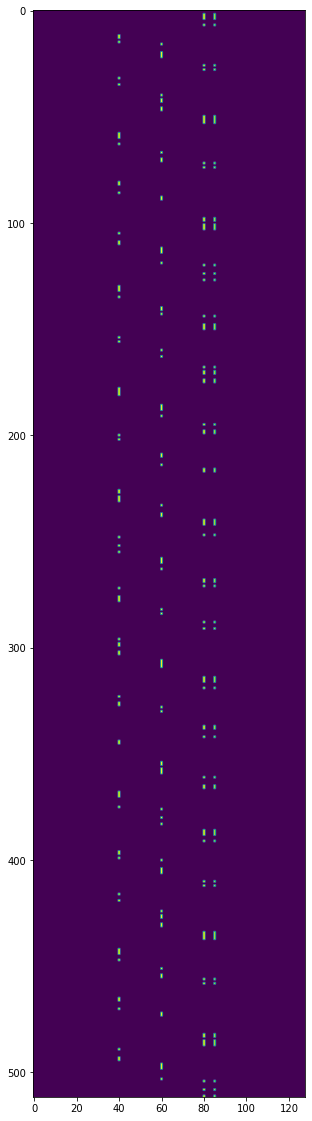

In [15]:
plt.figure(figsize=(15,20))
plt.imshow(result[:,0,:])